<a href="https://colab.research.google.com/github/KacperGrodecki/image_proccessing/blob/main/kuba_img_text_reading_found_words_analyzing_enchant.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [84]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [85]:
pip install pyenchant

In [86]:
!apt install -qq enchant

enchant is already the newest version (1.6.0-11.1).
0 upgraded, 0 newly installed, 0 to remove and 37 not upgraded.


In [87]:
!apt-get install myspell-pl

Reading package lists... Done
Building dependency tree       
Reading state information... Done
myspell-pl is already the newest version (20170707-1).
0 upgraded, 0 newly installed, 0 to remove and 37 not upgraded.


In [88]:
import pandas as pd
import cv2
import numpy as np
import re
import matplotlib.pyplot as plt      
import pickle
from os import listdir
from os.path import isfile, join
import gc
import sys
import pickle
import string
import enchant

In [89]:
d = enchant.Dict('PL')
d.check("guzik") # False



True

In [90]:
text=pd.read_csv('drive/MyDrive/kuba/odczyt_0_85.csv',index_col=0)

In [91]:
text.head()

,0
0,drive/MyDrive/kuba/zdjecia/fig1.jpg
1,Własność\narchiwum\nAktotwórca\nTytuł teczki\n...
2,IPN BU 0 639/223
3,KARTA INFORMACYJNA
4,Instytut Pamięci Narodowej w Warszawie


In [92]:
from difflib import SequenceMatcher

def similar(a, b):
    return SequenceMatcher(None, a, b).ratio()

In [135]:
def has_numbers(inputString):
    return any(char.isdigit() for char in inputString)

In [136]:
def word_correction_enchant(a):
    a=str(a)
    if 'drive/MyDrive/kuba/' in a:
      return a
    correct=''
    for word in a.split():
        if len(word)>1:
            if has_numbers(word) or len(word)<3:
              continue
            try:
              if int(d.check(word))==1:
                correct+=word.lower()+' '
            except:
              pass     
    return correct

In [137]:
correct=text.applymap(lambda x: word_correction_enchant(x))#dodać numery stron

In [139]:
correct.head(40)

,0
0,drive/MyDrive/kuba/zdjecia/fig1.jpg
1,własność archiwum tytuł teczki daty skrajne je...
2,ipn
3,karta informacyjna
4,instytut pamięci narodowej warszawie
5,
6,msw
7,tytuł teczki
8,pax- materiały dotyczące działalności zrzeszenia
9,daty skrajne


In [140]:
correct1 = correct[correct['0']!= '']

In [141]:
print(correct1.iloc[300:400].values)

[['poprzez ']
 ['śluby terenowe ']
 ['terenowe ']
 ['cechuje ']
 ['cechuje ']
 ['winne ']
 ['linia polityczną ']
 ['linia polityczną ']
 ['drive/MyDrive/kuba/zdjecia/fig112.jpg']
 ['ipn ']
 ['le. ']
 ['tezy ']
 ['wania pracy ']
 ['pak ']
 ['specjalne ']
 ['racuch ']
 ['drive/MyDrive/kuba/zdjecia/fig113.jpg']
 ['załącznik zestawu. ważniejszych ']
 ['załącznik zestawu ważniejszych ']
 ['informacji ']
 ['spotkanie pax ']
 ['aktywem katolickim katowicach ']
 ['stowarzyszenie pax zorganizowało katowicach spotkanie ']
 ['rzymskiego korespondenta pax redaktora czajkowskiego ']
 ['temat wizyty ministra ']
 ['księżmi działaczami świeckimi temat wizyty ministra watykanie. ']
 ['wzięli zajmujący się paxie ']
 ['pracą przewodniczący oddziału ']
 ['członkowie sekretariatu ']
 ['kiego katowicach ']
 ['ok. osób tym księży często- ']
 ['katowickiej pastorów kościoła luterańskiego ']
 ['zabrza ']
 ['redaktor czajkowski omówił problem wizyty min. ']
 ['kiego punktu stosunku watykanu polski okresie ']
 [

In [98]:
#pip uninstall spacy

In [99]:
pip install spacy==2.3.2

In [100]:
!python3 -m spacy download pl_core_news_md
#https://github.com/explosion/spaCy/issues/5140

     |████████████████████████████████| 79.9 MB 1.6 MB/s 
✔ Download and installation successful
You can now load the model via spacy.load('pl_core_news_md')


In [101]:
import spacy  
from spacy.lang.pl.examples import sentences 

In [102]:
#https://www.kaggle.com/pierremegret/gensim-word2vec-tutorial

In [103]:
nlp = spacy.load("pl_core_news_md")

In [142]:
df=correct1.copy()

In [155]:
def cleaning(doc):
    # Lemmatizes and removes stopwords
    # doc needs to be a spacy Doc object
    txt = [token.lemma_ for token in doc if not token.is_stop]
    # Word2Vec uses context words to learn the vector representation of a target word,
    # if a sentence is only one or two words long,
    # the benefit for the training is very small
    #if len(txt) > 2:
    return ' '.join(txt)

In [157]:
brief_cleaning = (str(row).lower() for row in df['0'])

In [107]:
from time import time

In [158]:
t = time()

txt = [cleaning(doc) for doc in nlp.pipe(brief_cleaning, batch_size=5000, n_threads=-1)]

print('Time to clean up everything: {} mins'.format(round((time() - t) / 60, 2)))

Time to clean up everything: 0.12 mins


In [159]:
df_clean = pd.DataFrame({'clean': txt})
df_clean = df_clean.dropna().drop_duplicates()
df_clean.shape

(7720, 1)

In [168]:
print(correct1.iloc[370:420].values)

[['nawet koła rewizjonistów konserwatystów. zarzucały one ']
 ['czyni zbyt wiele gestów pod adresem komu- ']
 ['rozbestwia psuje posoborową atmosferę ']
 ['potęguje kryzys. atmosfera wytrąciła ']
 ['argumenty kościele cierpiącym milczącym ']
 ['zachodzie przez niektórych hierarchów polskich. ']
 ['zdaniem red. czajkowskiego polsce ']
 ['normalizacji stosunków państwo-kościół. widzi papież ']
 ['watykan. polska dotychczas była wyspą którą ']
 ['omijały negatywne zjawiska kontestacji obojętności religijnej. ']
 ['papież dąży podpisania władzami polskimi porozumień ']
 ['gdyż jest prądy dotrą również polski. ']
 ['drive/MyDrive/kuba/zdjecia/fig115.jpg']
 ['ipn ']
 ['chce ochronić kościół przed wstrząsami jakie mają miejsce ']
 ['innych ']
 ['dyskusji zabrało głos tym księży. ']
 ['ewentualnym przyjazdem papieża ']
 ['episkopatu polskiego rozmów polska-watykan norma- ']
 ['stosunków państwo-kościół rolą biskupa dąbrowskiego ']
 ['watykanie pobytu problemem administracji ']
 ['ano ']
 ['koś

In [165]:
df_clean.values[300:350]

array([['socjalistyczny używać słowo partia .'],
       ['polski rzeczpospolita min . olszowski wyrazić'],
       ['uznanie polityka pojednanie pokój watykanu'],
       ['osobisty wkład papież szacunek'],
       ['katolik polsce wspólnie budować'],
       ['konsekwencja wizyta min . olszowskiego watykanie'],
       ['daleki rozmowa polski watykanem'],
       ['przyjazd casaroli'],
       ['rokować nadzieja osiągnięcie porozumienie'],
       ['bazia konstytucja przepis'],
       ['wolność religijny'],
       ['prasa włoski światowy wytworzyć odpowiedny klimat'],
       ['rozmowy móc zakłócić'],
       ['kół rewizjonista konserwatysta . zarzucać'],
       ['czynić zbyt gest adres kto -'],
       ['rozbestwia psuć posoborowy atmosfera'],
       ['potęgować kryzys . atmosfera wytrącić'],
       ['argument kościół cierpieć milczeć'],
       ['zachód który hierarcha polski .'],
       ['zdanie red . czajkowskiego polsce'],
       ['normalizacja stosunki państwo - kościół . widzieć papież'],


In [112]:
from gensim.models.phrases import Phrases, Phraser

In [169]:
sent = [row.split() for row in df_clean['clean']]

In [170]:
phrases = Phrases(sent, min_count=5, progress_per=100)

In [171]:
bigram = Phraser(phrases)

In [172]:
sentences = bigram[sent]

In [117]:
from collections import defaultdict  # For word frequency

In [174]:
word_freq = defaultdict(int)
for sent in sentences:
    for i in sent:
        word_freq[i] += 1
len(word_freq)

6311

In [175]:
sorted(word_freq, key=word_freq.get, reverse=True)[:20]

['.',
 '-',
 'drive_/',
 'mydrive_/',
 'kuba_/',
 'zdjecia_/',
 'pax',
 'praca',
 'działalność',
 'stowarzyszenie',
 'sprawa',
 'człowiek',
 'rozwój',
 'należeć',
 'swój',
 'polityczny',
 'dzień',
 'społeczny',
 'kościół',
 'nowy']

In [121]:
import multiprocessing

from gensim.models import Word2Vec

In [176]:
cores = multiprocessing.cpu_count()

In [177]:
w2v_model = Word2Vec(min_count=20,
                     window=2,
                     size=300,
                     sample=6e-5, 
                     alpha=0.03, 
                     min_alpha=0.0007, 
                     negative=20,
                     workers=cores-1)

In [178]:
t = time()

w2v_model.build_vocab(sentences, progress_per=10000)

print('Time to build vocab: {} mins'.format(round((time() - t) / 60, 2)))

Time to build vocab: 0.0 mins


In [179]:
t = time()

w2v_model.train(sentences, total_examples=w2v_model.corpus_count, epochs=30, report_delay=1)

print('Time to train the model: {} mins'.format(round((time() - t) / 60, 2)))

Time to train the model: 0.07 mins


In [180]:
w2v_model.init_sims(replace=True)

In [181]:
sorted(word_freq, key=word_freq.get, reverse=True)[:40]

['.',
 '-',
 'drive_/',
 'mydrive_/',
 'kuba_/',
 'zdjecia_/',
 'pax',
 'praca',
 'działalność',
 'stowarzyszenie',
 'sprawa',
 'człowiek',
 'rozwój',
 'należeć',
 'swój',
 'polityczny',
 'dzień',
 'społeczny',
 'kościół',
 'nowy',
 'polski',
 'kraj',
 'rola',
 'rzecz',
 'problem',
 'partia',
 'rok',
 'społeczeństwo',
 'potrzeba',
 'życie',
 'wartość',
 'poprzez',
 'stosunek',
 'gospodarczy',
 'państwo',
 'sytuacja',
 'okres',
 'referat',
 'władza',
 'dyskusja']

In [182]:
w2v_model.wv.most_similar(positive=["pax"])

[('.', 0.999844491481781),
 ('-', 0.9998292922973633),
 ('kultura', 0.9997574687004089),
 ('rozwój', 0.9997413158416748),
 ('sprawa', 0.9996953010559082),
 ('polski', 0.9996799826622009),
 ('mydrive_/', 0.9996740221977234),
 ('dzień', 0.9996715784072876),
 ('sytuacja', 0.9996553659439087),
 ('polityczny', 0.999650239944458)]

In [183]:
w2v_model.wv.most_similar(negative=["pax"])

[('ośrodek', -0.8909914493560791),
 ('pomoc', -0.9193365573883057),
 ('zaangażowanie', -0.9737930297851562),
 ('następujący', -0.9747750759124756),
 ('dziedzina', -0.987851083278656),
 ('ludzki', -0.9907494783401489),
 ('prasa', -0.9940305948257446),
 ('taki', -0.9942152500152588),
 ('inny', -0.9943341612815857),
 ('czas', -0.994398832321167)]

In [184]:
w2v_model.wv.doesnt_match(['pax', 'socjalizm', 'chrze_cija'])

/usr/local/lib/python3.7/dist-packages/gensim/models/keyedvectors.py:895: FutureWarning: arrays to stack must be passed as a "sequence" type such as list or tuple. Support for non-sequence iterables such as generators is deprecated as of NumPy 1.16 and will raise an error in the future.
  vectors = vstack(self.word_vec(word, use_norm=True) for word in used_words).astype(REAL)


'pax'

In [185]:
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
 
import seaborn as sns
sns.set_style("darkgrid")

from sklearn.decomposition import PCA
from sklearn.manifold import TSNE

In [186]:
def tsnescatterplot(model, word, list_names):
    """ Plot in seaborn the results from the t-SNE dimensionality reduction algorithm of the vectors of a query word,
    its list of most similar words, and a list of words.
    """
    arrays = np.empty((0, 300), dtype='f')
    word_labels = [word]
    color_list  = ['red']

    # adds the vector of the query word
    arrays = np.append(arrays, model.wv.__getitem__([word]), axis=0)
    
    # gets list of most similar words
    close_words = model.wv.most_similar([word])
    
    # adds the vector for each of the closest words to the array
    for wrd_score in close_words:
        wrd_vector = model.wv.__getitem__([wrd_score[0]])
        word_labels.append(wrd_score[0])
        color_list.append('blue')
        arrays = np.append(arrays, wrd_vector, axis=0)
    
    # adds the vector for each of the words from list_names to the array
    for wrd in list_names:
        wrd_vector = model.wv.__getitem__([wrd])
        word_labels.append(wrd)
        color_list.append('green')
        arrays = np.append(arrays, wrd_vector, axis=0)
        
    # Reduces the dimensionality from 300 to 50 dimensions with PCA
    reduc = PCA(n_components=18).fit_transform(arrays)
    
    # Finds t-SNE coordinates for 2 dimensions
    np.set_printoptions(suppress=True)
    
    Y = TSNE(n_components=2, random_state=0, perplexity=15).fit_transform(reduc)
    
    # Sets everything up to plot
    df = pd.DataFrame({'x': [x for x in Y[:, 0]],
                       'y': [y for y in Y[:, 1]],
                       'words': word_labels,
                       'color': color_list})
    
    fig, _ = plt.subplots()
    fig.set_size_inches(9, 9)
    
    # Basic plot
    p1 = sns.regplot(data=df,
                     x="x",
                     y="y",
                     fit_reg=False,
                     marker="o",
                     scatter_kws={'s': 40,
                                  'facecolors': df['color']
                                 }
                    )
    
    # Adds annotations one by one with a loop
    for line in range(0, df.shape[0]):
         p1.text(df["x"][line],
                 df['y'][line],
                 '  ' + df["words"][line].title(),
                 horizontalalignment='left',
                 verticalalignment='bottom', size='medium',
                 color=df['color'][line],
                 weight='normal'
                ).set_size(15)

    
    plt.xlim(Y[:, 0].min()-50, Y[:, 0].max()+50)
    plt.ylim(Y[:, 1].min()-50, Y[:, 1].max()+50)
            
    plt.title('t-SNE visualization for {}'.format(word.title()))

In [187]:
sorted(word_freq, key=word_freq.get, reverse=False)[:20]

['fig1.jpg',
 'archiwum',
 'kart',
 'pamięć',
 'zrzeszenie',
 'fig10.jpg',
 'gł',
 'mem',
 'honorarium',
 'podróża',
 'służbowy',
 'remonta',
 'augustyna',
 'społ.',
 'opłata',
 'ww',
 'razem',
 'fig100.jpg',
 'pogłębiać',
 'skłaniać']

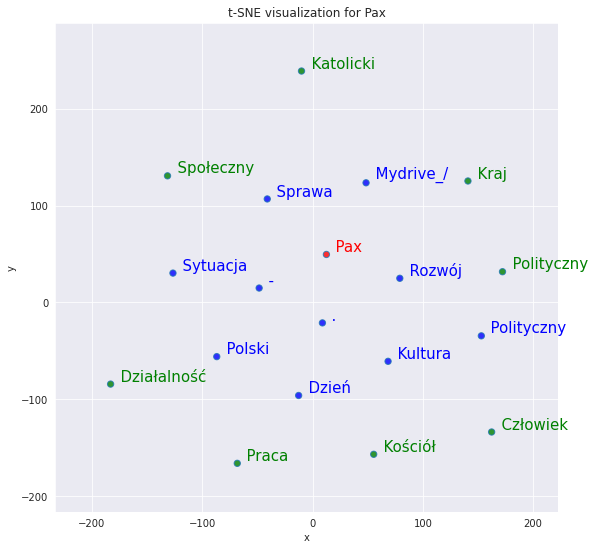

In [188]:
tsnescatterplot(w2v_model, 'pax', ['praca', 'działalność', 'człowiek', 'polityczny', 'kraj', 'kościół', 'społeczny','katolicki'])